# Lab 9: Data Visualization Using Matplotlib (Part3)

## Density Plots

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

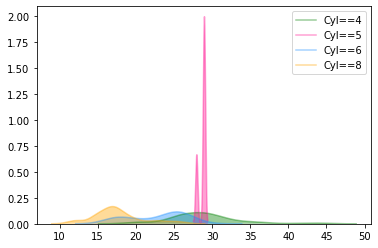

In [5]:
#Q1

data=pd.read_csv("mpg.csv")
plt.figure()

#seaborn: kernel density plot
sns.kdeplot(data.loc[data.cyl == 4,'hwy'],
            shade=True,
            color='green',
            label='Cyl==4',
            alpha=0.4)
sns.kdeplot(data.loc[data.cyl == 5,'hwy'],
            shade=True,
            color='deeppink',
            label='Cyl==5',
            alpha=0.4)
sns.kdeplot(data.loc[data.cyl == 6,'hwy'],
            shade=True,
            color='dodgerblue',
            label='Cyl==6',
            alpha=0.4)
sns.kdeplot(data.loc[data.cyl == 8,'hwy'],
            shade=True,
            color='orange',
            label='Cyl==8',
            alpha=0.4)

plt.show()

## Multiple Subplots

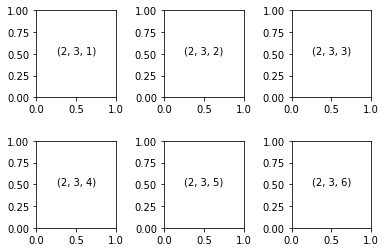

In [23]:
#Q2 create a 2x3 grid: plt.subplot(row,column,which)

plt.figure()

plt.subplots_adjust(hspace=0.5,wspace=0.6)

for i in range(1,7):
    plt.subplot(2,3,i)
    plt.text(0.5,0.5,str((2,3,i)),ha='center')#ha:horizontal alignment   

plt.show()

<Figure size 432x288 with 0 Axes>

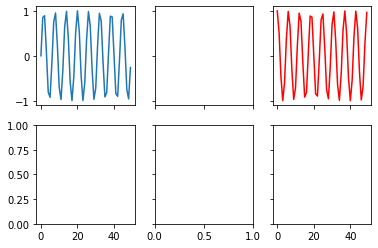

In [28]:
# Q3 create a 2x3 graph with sin and cos plots

plt.figure()

#sharex='col': share x axis, sharey='row':share y axis
fig,ax=plt.subplots(2,3,sharex='col',sharey='row')

x=np.linspace(0,50)
ax[0,0].plot(np.sin(x))
ax[0,2].plot(np.cos(x),color='red')

plt.show()


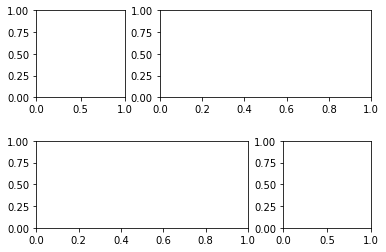

In [40]:
# Q4
fig = plt.figure()

grid=plt.GridSpec(2,3,wspace=0.4,hspace=0.5)
#grid[row,column]
fig.add_subplot(grid[0,0])
fig.add_subplot(grid[0,1:3])
fig.add_subplot(grid[1,:2])
fig.add_subplot(grid[1,2])
plt.show()

## Marginal Boxplots

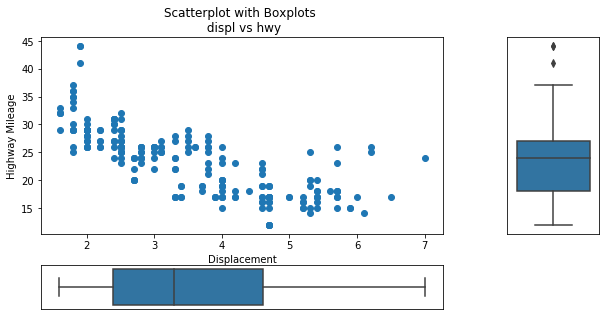

In [67]:
# Q5

fig=plt.figure(figsize=(10,5))

##get the right grid
grid=plt.GridSpec(4,4,wspace=0.7,hspace=0.7)
ax_main=fig.add_subplot(grid[0:-1,:3])  #-1:one column before the last column
ax_right=fig.add_subplot(grid[:3,3])
ax_bottom=fig.add_subplot(grid[3,:3])

##plot the main graph(scatterplot)
ax_main.scatter(data.displ,data.hwy)

##plot the right boxplot
sns.boxplot(data.hwy,ax=ax_right,orient='v')
ax_right.set(xticks=[],yticks=[],ylabel="")

##plot the bottom boxplot
sns.boxplot(data.displ,ax=ax_bottom)
ax_bottom.set(xticks=[],yticks=[],xlabel="")

##set title, x label, y label
ax_main.set(title='Scatterplot with Boxplots \n displ vs hwy',
            xlabel="Displacement",
            ylabel="Highway Mileage")

plt.show()

## Plotting with different scales using secondary Y axis


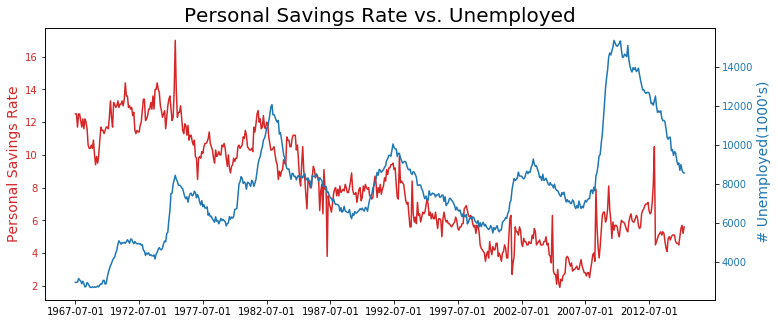

In [89]:
# Q6
data=pd.read_csv('economics.csv')

fig=plt.figure(figsize=(12,5))

plt.plot(data.date,data.psavert,color='tab:red')
ax = plt.gca()

## set the left y-axis(main y-axis)
ax.tick_params(axis='y',
               labelcolor='tab:red')
ax.set_ylabel('Personal Savings Rate',
              color='tab:red',
              fontsize=14)

## set the secondary y-axis(right)
ax_right=ax.twinx() ##create a twin y-axis that share the same x-axis
ax_right.plot(data.date,
              data.unemploy,
              color='tab:blue')
ax_right.tick_params(axis='y',
                     labelcolor='tab:blue')
ax_right.set_ylabel(" # Unemployed(1000's)",
                    color='tab:blue',
                    fontsize=14)

## set the x axis
ax.set_xticks(np.arange(0,len(data.date),60))

plt.title("Personal Savings Rate vs. Unemployed",
          fontsize=20)
plt.show()